# DTSC 710 Homework 3: Building Linear Regression Model by Hand Picking Features

Selina Narain

ID 1261565

In [1]:
# Importing necessary libraries
import pandas as pd
import math 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA


In [2]:
# Reading Boston Housing csv file and initializing into dataframe
df1 = pd.read_csv('/Users/selinanarain/Desktop/DTSC710/HW3/BostonHousing.csv')
df1

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Part 1 - Preprocessing: 20%

● Find missing value. Fill missing values by the mean of the corresponding column

In [4]:
df1.isnull().sum()

# No missing values

#X = df1.drop("MEDV",1)   #Feature Matrix
#y = df1["MEDV"]          #Target Variable
#df1.head()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

● Use heatmap to identify Multicollinearity.

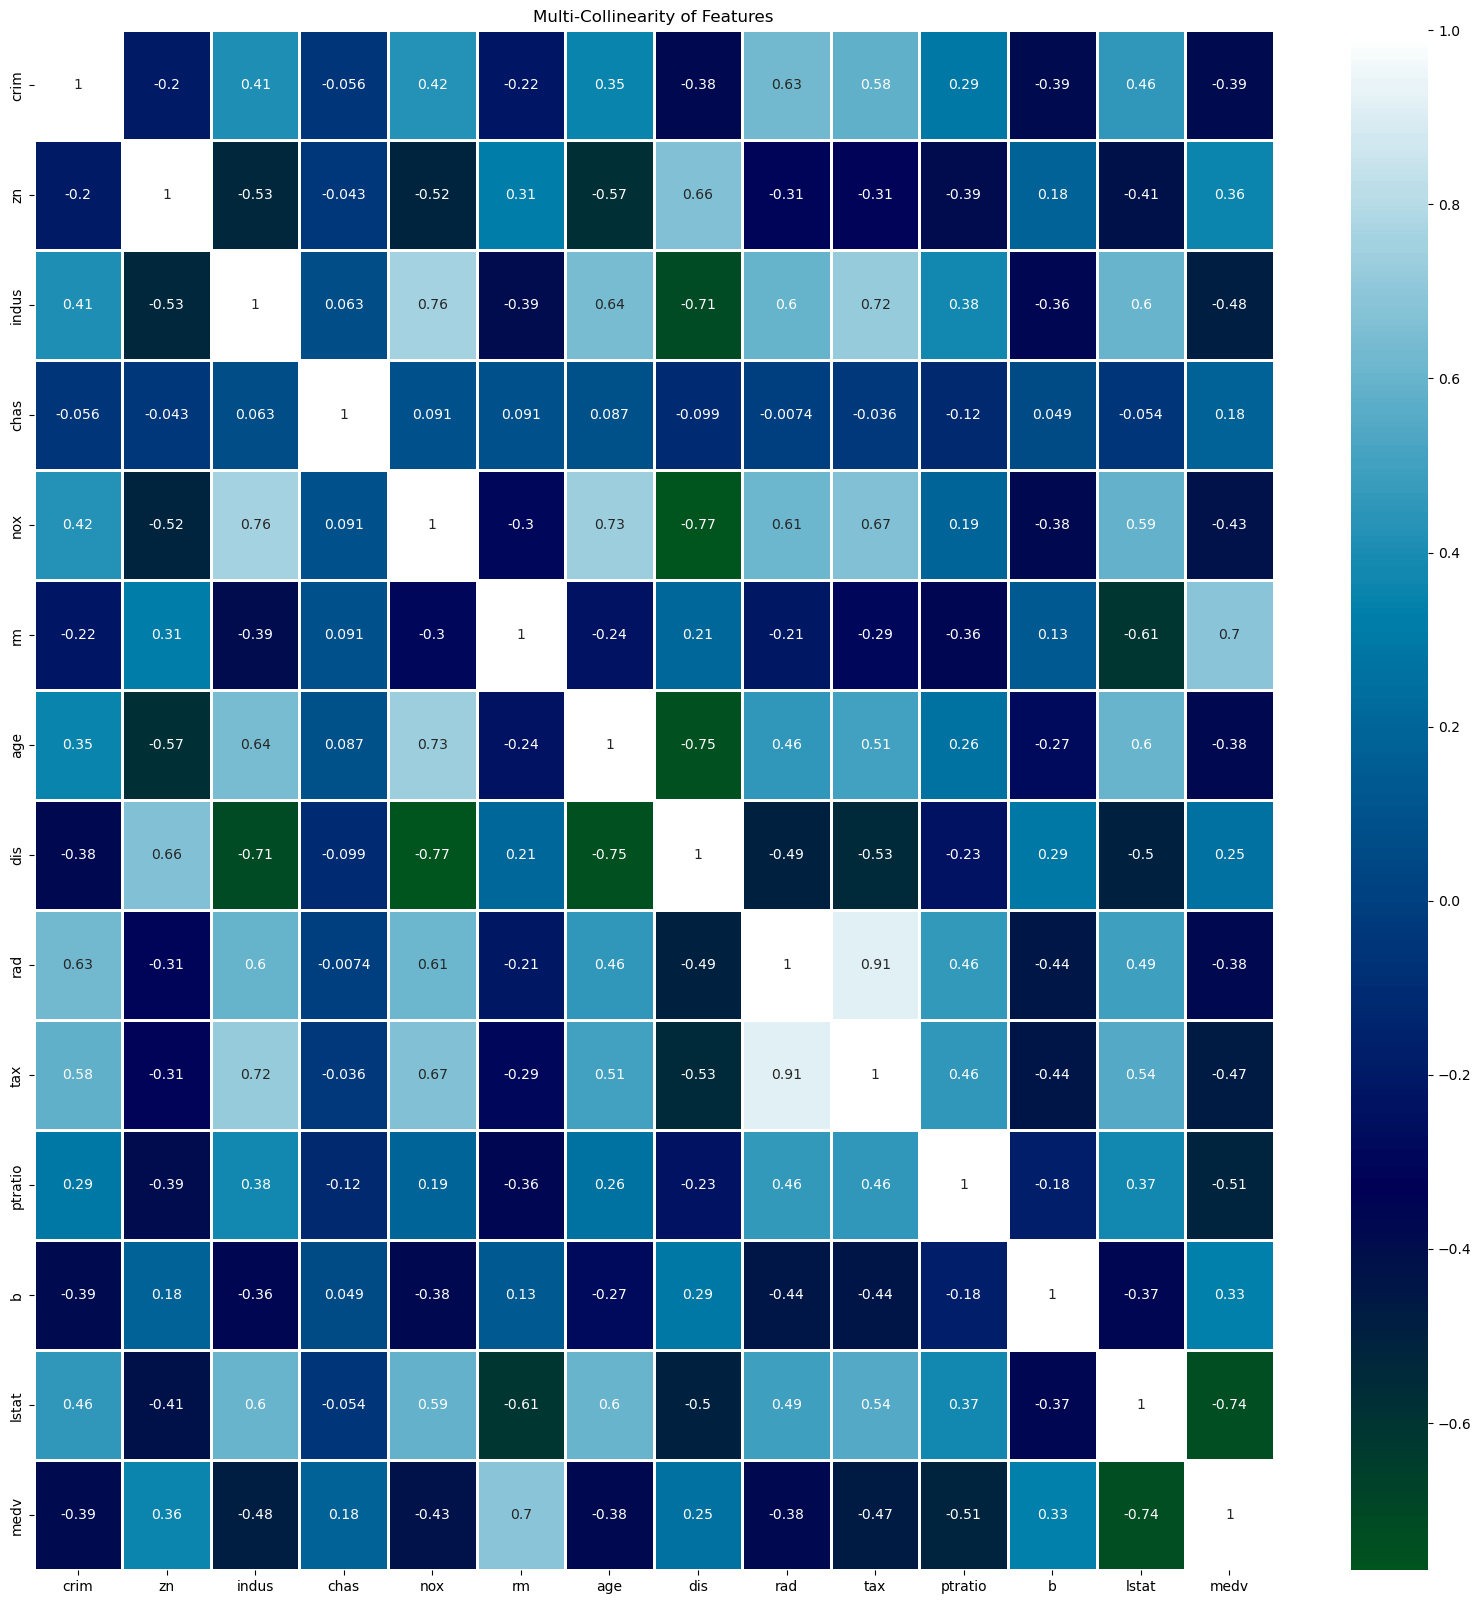

In [5]:
# Create a covariance matrix
corr = df1.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

# Draw the heatmap
sns.heatmap(corr, center=0, linewidths=0.8, cmap='ocean', annot=True)
ax.set_title('Multi-Collinearity of Features')
plt.savefig('multiCollinearityFigure.png')

In [6]:
#Correlation with target variable
cor_target = abs(corr["medv"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.5]
relevant_features

rm         0.695360
ptratio    0.507787
lstat      0.737663
medv       1.000000
Name: medv, dtype: float64

● If two independent variables are correlated with each other, you may remove the one that is less correlated with the dependent variable.

In [7]:
#Comparing correlation of independent variables
print(df1[["lstat","ptratio"]].corr())
print(df1[["rm","lstat"]].corr())

#Remove rm since it is less correlated
df1 = df1.drop(columns=['rm'], axis = 1)

            lstat   ptratio
lstat    1.000000  0.374044
ptratio  0.374044  1.000000
             rm     lstat
rm     1.000000 -0.613808
lstat -0.613808  1.000000


● Drop columns that have no correlation with the dependent variable.

In [8]:
#Identify correlation
nonrelevant_features = cor_target[cor_target < 0.5]
nonrelevant_features

crim     0.388305
zn       0.360445
indus    0.483725
chas     0.175260
nox      0.427321
age      0.376955
dis      0.249929
rad      0.381626
tax      0.468536
b        0.333461
Name: medv, dtype: float64

In [9]:
#Drop no correlation variables
df1 = df1.drop(columns=['crim', 'zn', 'indus', 'chas', 'nox', 'age', 'dis', 'rad', 'tax', 'b'], axis = 1)
df1

,ptratio,lstat,medv
0,15.3,4.98,24.0
1,17.8,9.14,21.6
2,17.8,4.03,34.7
3,18.7,2.94,33.4
4,18.7,5.33,36.2
...,...,...,...
501,21.0,9.67,22.4
502,21.0,9.08,20.6
503,21.0,5.64,23.9
504,21.0,6.48,22.0


## Part 2 - Build model to get baseline - 20%


● Perform 8:2 test/train split

In [10]:
# Split dataset into features and target variable
feature_names = ['ptratio', 'lstat']
X = df1[feature_names] # Features
y = df1.medv # Target variable

In [11]:
# Split df into train and test sets 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

● Train model with all remaining variables.

In [12]:
# Create decision linear regression object
linearRegModel = LinearRegression()

# Train decision tree classifer
linearRegModel = linearRegModel.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = linearRegModel.predict(X_test)

● Perform 10 Fold Cross Validation.

In [13]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_val_score(linearRegModel, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.76394715, 0.50511268, 0.5677843 , 0.59822061, 0.45752034,
       0.44747327, 0.59049898, 0.63288713, 0.69649013, 0.67259974])

In [14]:
# step-1: create a cross-validation scheme
#folds = KFold(n_splits = 10, shuffle = True, random_state = 42)

# step-2: specify range of hyperparameters to tune
#hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
#lm = LinearRegression()
#lm.fit(X_train, y_train)
#rfe = RFE(lm)             

# 3.2 call GridSearchCV()
#model_cv = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'r2', cv = folds, verbose = 1, return_train_score=True)      

# fit the model
#model_cv.fit(X_train, y_train)    

● Report mean of RMSE

In [15]:
#MSE = mean_squared_error(y, y_pred)
#np.sqrt(MSE)
np.sqrt(np.mean(np.absolute(scores)))

0.7702294680523589

● Report SD of RMSE

In [16]:
np.sqrt(np.std(np.absolute(scores)))

0.312842234076534

## Part 3 - Create Principle Components - 20%

● Load dataset into new dataframe

In [17]:
# Reading Boston Housing csv file and initializing into dataframe
df2 = pd.read_csv('/Users/selinanarain/Desktop/DTSC710/HW3/BostonHousing.csv')
df2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [18]:
df2.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


● Fill missing values with mean

In [19]:
df2.isnull().sum()

# No missing values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

● DO NOT DROP COLUMNS - PCA will fix multicollinearity problems for us

● Apply standard scaler to dataset

In [20]:
# Split dataset into features and target variable
#feature_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
#X = df2[feature_names] # Features
#y = df2.medv # Target variable

#X = df2.drop(labels='medv', axis=1).values
#y = df2['medv'].values

In [21]:
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
scaler.fit(df2)
#scaled_data = scaler.fit(X)
X_scaled = scaler.transform(df2)
#scaled_data = StandardScaler(df2)

● Create principal components for features

In [22]:
feature_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
X = df2[feature_names] # Features
y = df2.medv # Target variable

#pca = PCA(n_components=0.95)

#X_scaled_data_pca = pca.fit_transform(X)

#df2_scaled_pca = pd.DataFrame(data = X_scaled_pca)

#print('Original # Features: ', X.shape[1])
#print('Reduced # Features: ', X_scaled_data_pca.shape[1])

In [23]:
#df_std = pd.DataFrame(columns=df2.columns)


pca = PCA(n_components=13)
#X = scaled_data.drop(labels='medv',axis=1)
X_pca = pca.fit_transform(X)
#X_pca = pca.transform(X_scaled)
df_std_pca = pd.DataFrame(X_pca, columns=feature_names)
#df_std_pca = df2.assign(df2,columns='medv')
#df_std_pca = pd.DataFrame(['medv'])
df_std_pca['medv'] = df2['medv']

In [24]:
# Percentage of variance explained by each of the selected components

pca.explained_variance_ratio_ * 100

np.cumsum(pca.explained_variance_ratio_ * 100)

array([ 80.58231752,  96.8875143 ,  99.02237522,  99.71807428,
        99.84806947,  99.92079149,  99.96269594,  99.98754979,
        99.99608891,  99.99916963,  99.99983525,  99.99999203,
       100.        ])

Text(0, 0.5, 'Explained variance')

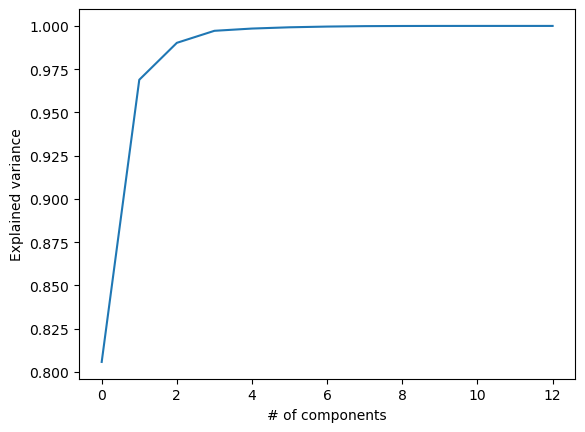

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Explained variance')

<AxesSubplot: >

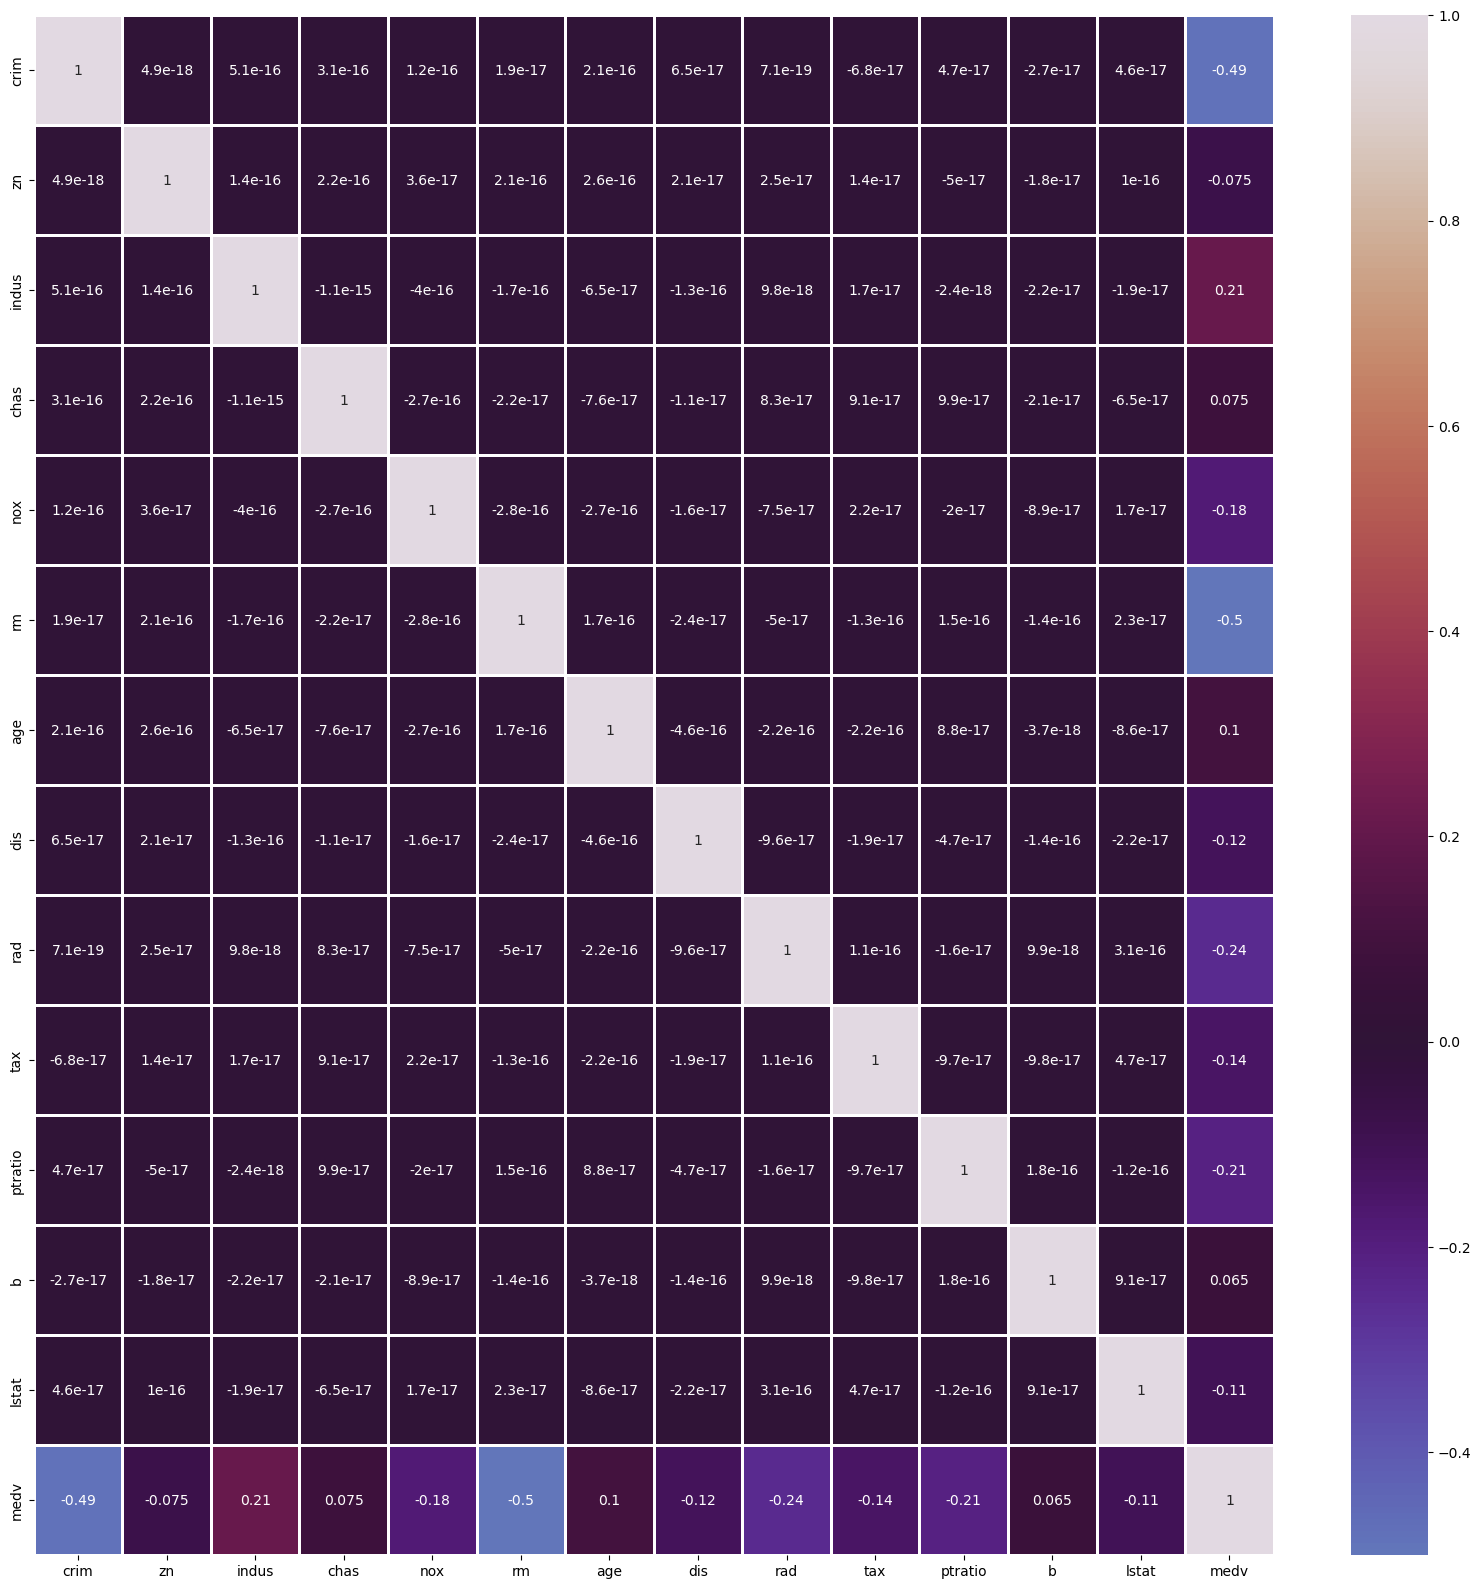

In [26]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_std_pca.corr(), center=0, linewidth=0.8, cmap='twilight', annot=True)

## Part 4 - Building the Model - 20%

● Fit the model using (k) Principal Components. (k) should be determined from looking at the sorted array of principal components.

In [27]:
# Split df into train and test sets 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [28]:
# Create decision linear regression object
linearRegModel = LinearRegression()

# Train decision tree classifer
linearRegModel = linearRegModel.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = linearRegModel.predict(X_test)

● Perform 10 Fold Cross Validation

In [29]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_val_score(linearRegModel, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.79319754, 0.54752493, 0.73863801, 0.78150913, 0.63595431,
       0.62271706, 0.69085847, 0.7939538 , 0.81252891, 0.80876224])

● Report mean of RMSE

In [30]:
np.sqrt(np.mean(np.absolute(scores)))

0.8500379053354659

● Report SD of RMSE

In [31]:
np.sqrt(np.std(np.absolute(scores)))

0.2976170261460233

In [32]:
#finalDf = pd.concat([principal_bhousing_df, df2[['medv']]], axis = 1)
#finalDf


## Part 5 - Analysis - 20%

Which model had the best accuracy? Using PCA or handpicked features? Provide chart of RMSE from both models